# Cluster

segmento de mercado<br>
encontrar grupo de clientes que iram comprar determinado produto(mala direta)<br>
produtos similares<br>
perfis similhares<br>
redes sociais<br>


quando grupo comeca e outro termina<br> 
Algoritimo de lloyd

1.Inicializar os centroides aleatorimente(centro do cluster aleatorio)<br>
2.calcular distancia e associar o mais proximo<br>
3.calcula media e posiciona mais ao centro

distancia euclidiana, calculando ate encontrar media<br>
Kmeans++: reduz a probabilidade de inicializacao ruim, selecionando centroides iniciais que estao mais longes uns dos outros.O primeiro e selecionado aletoriamente e o restante apartir desse ponto

Esolher o K<br>
escolho por regra de classificasao, bom e ruim, preto,branco e azul<br>
ou escolho por raiz(n/2)

elbow: testa varios K

quando menor o valor wcss melhor e a quantidade de cluster

Elbow: acha o ponto minimo e busca pela menor variacao desse ponto

In [2]:
import pandas as pd 
import seaborn as sn
import numpy as np

x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48] # idades 
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500] # salario

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])
scaler_salario = StandardScaler() # preciso padronizar para fazer com que nao tenha problemas ao decidir valores mais importantes
base_salario = scaler_salario.fit_transform(base_salario)

In [4]:
km = KMeans(n_clusters=3,init='k-means++')
km.fit(base_salario)

c:\Users\Familia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [5]:
centroides = km.cluster_centers_
centroides

array([[ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093]])

In [7]:
rot = km.labels_
rot 

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

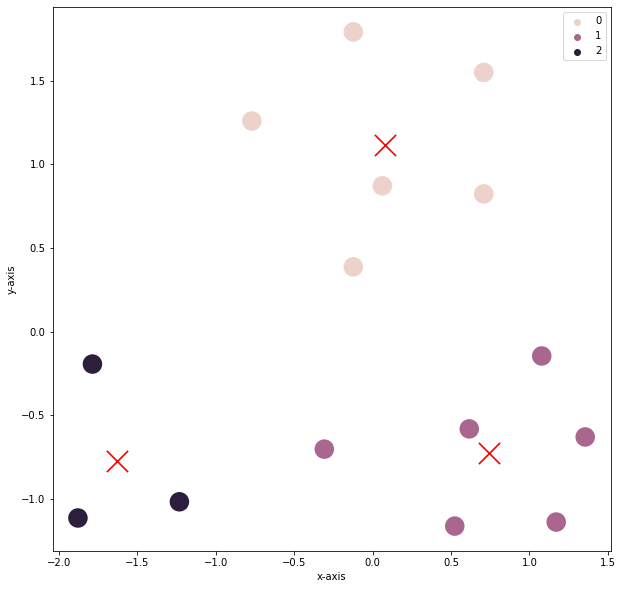

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(10);
ax=sn.scatterplot(x=base_salario[:,0],y=base_salario[:,1],hue=rot,s=450);
ax=sn.scatterplot(x=centroides[:,0],y=centroides[:,1],s=450,color='r',marker='x');
ax.set(xlabel="x-axis", ylabel="y-axis")

# visualizing illustration
plt.show()

In [9]:
from sklearn.datasets import make_blobs

x_random,y_random = make_blobs(n_samples=200,centers=5)

x_random[:5],y_random[:5]

(array([[-8.63741274, -7.63387865],
        [-8.78879277, -6.90899458],
        [ 1.46331537, -5.65429559],
        [-6.43194392, -8.80666791],
        [-4.64541072, -1.08510284]]),
 array([4, 4, 2, 4, 3]))

In [10]:
km2 = KMeans(n_clusters=5)
km2.fit(x_random)

c:\Users\Familia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [11]:
# tentando prever a grupo 
km2.predict([[  4.54964651,  -3.83575987]])

array([3])